# 加载自定义模块

In [89]:
import mxjqsakit

# 读取数据

In [90]:
import pandas as pd
# gbsg = pd.read_csv("GBSG.csv")
# gbsg.head()
Train = pd.read_csv("Combined_train_cox.csv")
Internal = pd.read_csv("Combined_val_cox.csv")
Train.head()
#Internal.head()

,ID,Radiomics,DL,DL25D,event,duration
0,bianjiePVP.nii.gz,18.654566,0.175499,1.642236,1,44.33
1,caibinPVP.nii.gz,69.519793,-0.369580,0.304407,0,17.63
2,caiqingxiangPVP.nii.gz,29.456680,-1.105097,-0.225015,1,7.43
3,caiyunboPVP.nii.gz,30.791821,-0.921918,-0.400290,1,29.10
4,caoguofangPVP.nii.gz,41.666606,-0.021541,1.873512,0,21.33


In [91]:
# 剔除无关变量
# gbsg.drop("pid", axis=1, inplace=True)
# gbsg.head()
Train.drop("ID", axis = 1, inplace=True)
Internal.drop("ID", axis = 1, inplace=True)
Train.shape
Train.head()
# Internal.shape

,Radiomics,DL,DL25D,event,duration
0,18.654566,0.175499,1.642236,1,44.33
1,69.519793,-0.369580,0.304407,0,17.63
2,29.456680,-1.105097,-0.225015,1,7.43
3,30.791821,-0.921918,-0.400290,1,29.10
4,41.666606,-0.021541,1.873512,0,21.33


In [92]:
# 数据列类型
Train.dtypes
Internal.dtypes

Radiomics    float64
DL           float64
DL25D        float64
event          int64
duration     float64
dtype: object

In [93]:
# 分类型自变量训练集
# catnames = [Train.columns.to_list()[i] for i in [0, 1, 2, 3]]
# catnames_train = Train.columns.to_list()[0:8]
catnames_train = []
print(catnames_train)
# 分类型自变量内部验证集
# catnames = [Train.columns.to_list()[i] for i in [0, 1, 2, 3]]
# catnames_internal = Internal.columns.to_list()[0:8]
catnames_internal = []
print(catnames_internal)

[]
[]


In [94]:
# 连续型自变量训练集
connames_train = [i for i in Train.columns.to_list() if i not in catnames_train + ["duration", "event"]]
print(connames_train)
# 连续型自变量内部验证集
connames_internal = [i for i in Train.columns.to_list() if i not in catnames_internal + ["duration", "event"]]
print(connames_internal)

['Radiomics', 'DL', 'DL25D']
['Radiomics', 'DL', 'DL25D']


In [95]:
# 所有自变量训练集
allnames_train = catnames_train + connames_train
print(allnames_train)
# 所有自变量内部验证集
allnames_internal = catnames_internal + connames_internal
print(allnames_internal)

['Radiomics', 'DL', 'DL25D']
['Radiomics', 'DL', 'DL25D']


In [96]:
# # 分类变量转换为category训练集
for i in catnames_train:
    Train[i] = Train[i].astype("category")
Train.dtypes
# 分类变量转换为category内部验证集
for i in catnames_internal:
    Internal[i] = Internal[i].astype("category")
Internal.dtypes

Radiomics    float64
DL           float64
DL25D        float64
event          int64
duration     float64
dtype: object

In [97]:
# 描述统计表训练集
from tableone import TableOne
table1 = TableOne(Train, dip_test=True, normal_test=True, tukey_test=True)
table1
# 描述统计表内部验证集
from tableone import TableOne
table1 = TableOne(Internal, dip_test=True, normal_test=True, tukey_test=True)
table1

,,Missing,Overall
n,,,164
"Radiomics, mean (SD)",,0,29.4 (13.5)
"DL, mean (SD)",,0,0.1 (0.8)
"DL25D, mean (SD)",,0,0.2 (0.8)
"event, mean (SD)",,0,0.7 (0.5)
"duration, mean (SD)",,0,26.9 (15.8)


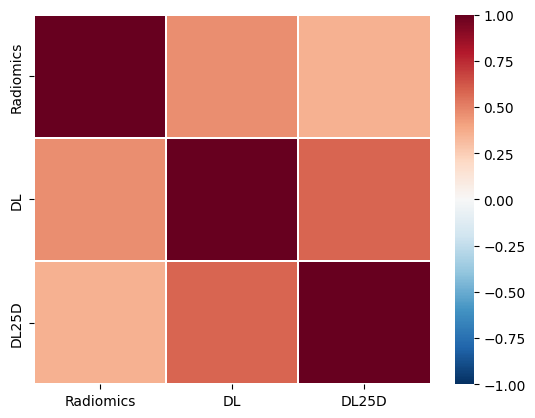

In [98]:
# 数字变量相关系数热图
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Train.loc[:, connames_train].corr(), vmin=-1, vmax=1, center=0, linecolor="white", linewidths=0.1, cmap="RdBu_r")
# plt.show()
plt.savefig("r_x_cor_heatmap.pdf", dpi=300)

# 拆分数据

In [99]:
from sksurv.datasets import get_x_y
# gbsgx, gbsgy = get_x_y(gbsg, attr_labels=["status", "rfstime"], pos_label=1)
# print(gbsgx)
# print(gbsgy)
# 训练集
Trainx, Trainy = get_x_y(Train, attr_labels=["event", "duration"], pos_label=1)
print(Trainx)
print(Trainy)
# 内部验证集
Internalx, Internaly = get_x_y(Internal, attr_labels=["event", "duration"], pos_label=1)
print(Internalx)
print(Internaly)

     Radiomics        DL     DL25D
0    18.654566  0.175499  1.642236
1    69.519793 -0.369580  0.304407
2    29.456680 -1.105097 -0.225015
3    30.791821 -0.921918 -0.400290
4    41.666606 -0.021541  1.873512
..         ...       ...       ...
376  39.909971  1.893295  1.494143
377  22.180657  0.022855  0.274175
378  11.524573 -1.124899 -0.362638
379  31.465799 -0.276725  0.174087
380  35.888201  0.226580  0.715797

[381 rows x 3 columns]
[( True,  44.33) (False,  17.63) ( True,   7.43) ( True,  29.1 )
 (False,  21.33) ( True,  10.37) ( True,   5.57) ( True,  19.87)
 ( True,  11.1 ) ( True,  10.67) ( True,   4.1 ) ( True,  17.83)
 ( True,  12.3 ) (False,  13.03) ( True,  17.57) ( True,  17.8 )
 ( True,  24.6 ) (False,  35.7 ) ( True,  25.47) ( True,  26.2 )
 ( True,  21.2 ) ( True,   5.7 ) (False,  62.3 ) ( True,   6.4 )
 ( True,  21.43) ( True,  63.2 ) ( True,  19.5 ) ( True,   4.13)
 ( True,  36.3 ) (False,  46.13) ( True,  19.27) ( True,  36.1 )
 (False,  15.83) (False,  24.4 ) ( T

## KM估计

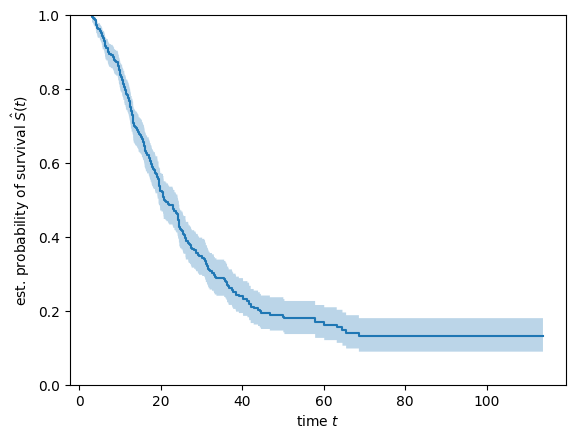

<Figure size 640x480 with 0 Axes>

In [100]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

time, surv_prob, conf_int = kaplan_meier_estimator(Trainy["event"], Trainy["duration"], conf_type = "log-log")
plt.step(time, surv_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.3, step="post")
plt.ylim(0,1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()
plt.savefig("r_km.pdf", dpi=300)

## 训练集和测试集

In [101]:
# from sklearn.model_selection import train_test_split
# trainx, testx, trainy, testy = train_test_split(gbsgx, gbsgy, test_size=0.2, stratify=gbsg["status"], random_state=42)
print(Trainx.shape)
print(Trainx.dtypes)
print(Internalx.shape)
print(Internalx.dtypes)
print(Trainy.shape)
print(Internaly.shape)

(381, 3)
Radiomics    float64
DL           float64
DL25D        float64
dtype: object
(164, 3)
Radiomics    float64
DL           float64
DL25D        float64
dtype: object
(381,)
(164,)


In [102]:
import numpy as np
print("训练集事件时间范围", np.quantile(Trainy[Trainy["event"]]["duration"], [0, 1]))
print("测试集事件时间范围", np.quantile(Internaly[Internaly["event"]]["duration"], [0, 1]))

训练集事件时间范围 [ 3.2  68.63]
测试集事件时间范围 [ 3.37 77.6 ]


In [71]:
# import warnings
# warnings.filterwarnings("ignore")
# # 训练集测试集比较
# gbsg2 = gbsg.copy()
# gbsg2["dataset"] = "test"
# gbsg2["dataset"].iloc[trainx.index] = "train"
# table2 = TableOne(gbsg2, groupby="dataset", pval=True, htest_name=True)
# table2

In [ ]:
# gbsgx2, gbsgy2 = get_x_y(gbsg2, attr_labels=["status", "rfstime"], pos_label=1)

In [ ]:
# from sksurv.compare import compare_survival
# compare_survival(gbsgy2, gbsgx2["dataset"], return_stats=True)

(0.1613105083761521,
 0.687952818714026,
        counts  observed    expected  statistic
 group                                         
 test      138        60   57.273392   2.726608
 train     548       239  241.726608  -2.726608,
 array([[ 46.08744194, -46.08744194],
        [-46.08744194,  46.08744194]]))

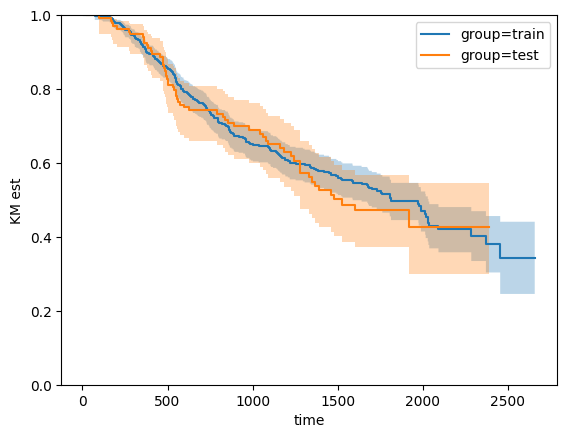

In [ ]:
# mxjqsakit.group_km(y=gbsgy2, event_status="status", event_time="rfstime", group=gbsgx2["dataset"])
# plt.savefig("r_km_group.pdf", dpi=300)

# rf

## 预处理设定

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
cattfppl = Pipeline(steps=[("impute", SimpleImputer(missing_values=pd.NA, strategy='most_frequent')), 
                           ("ohe", OneHotEncoder(sparse_output=False, drop="first"))])
contfppl = Pipeline(steps=[("impute", SimpleImputer(missing_values=pd.NA, strategy='median'))])
prep_rf = ColumnTransformer(
    [
        ("categorical", cattfppl, catnames_train),
        ("numerical", contfppl, connames_train)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")
prep_rf

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(missing_values=<NA>,
                                                                strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 []),
                                ('numerical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(missing_values=<NA>,
                                                                strategy='median'))]),
                                 ['Radiomics', 'DL', 'DL25D'])],
                  verbose_feature_names_out=False)

## 模型训练+超参数调优

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sksurv.ensemble import RandomSurvivalForest
import warnings
warnings.filterwarnings("ignore")

# 管道
rf_steps = [("prep", prep_rf), ("rf", RandomSurvivalForest(random_state=42))]

# 重抽样设定
rf_cv_hpo = KFold(n_splits = 5, shuffle = True, random_state=42)

# 超参数调优空间
rf_hpspace = dict(rf__max_depth = [2, 3, 4],
                  rf__max_features = [1, 2])

### 网格搜索

In [105]:
rf = mxjqsakit.hpo(datax = Trainx, 
                    datay = Trainy, 
                    set_steps = rf_steps,
                    set_searchtype = "GridSearchCV", 
                    set_hpspace = rf_hpspace, 
                    set_cv = rf_cv_hpo)
rf

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(missing_values=<NA>,
                                                                                                        strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         []),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(missing_values=<NA>,
                                                                                                        strategy='median'))]),
                                                                         ['Radiomics',
                                                                          'DL',
                                                                          'DL25D'])],
                                                          verbose_feature_names_out=False)),
                                       ('rf',
                                        RandomSurvivalForest(random_state=42))]),
             param_grid={'rf__max_depth': [2, 3, 4],
                         'rf__max_features': [1, 2]})

In [106]:
mxjqsakit.tuneplot(rf, scoreindim=True)

,rf__max_depth,rf__max_features,mean_cv_score,std_cv_score,rank_cv_score
0,2,1,0.747183,0.027149,4
1,2,2,0.743439,0.021609,6
2,3,1,0.752588,0.024927,1
3,3,2,0.746843,0.024444,5
4,4,1,0.751947,0.025311,2
5,4,2,0.748867,0.026419,3


### 随机搜索

In [54]:
rf = mxjqsakit.hpo(datax = trainx, 
                    datay = trainy, 
                    set_steps = rf_steps,
                    set_searchtype = "RandomizedSearchCV", 
                    set_hpspace = rf_hpspace, 
                    set_cv = rf_cv_hpo,
                    set_randomiters = 20)
rf

NameError: name 'trainx' is not defined

In [ ]:
mxjqsakit.tuneplot(rf, scoreindim=True)

## 预测评估

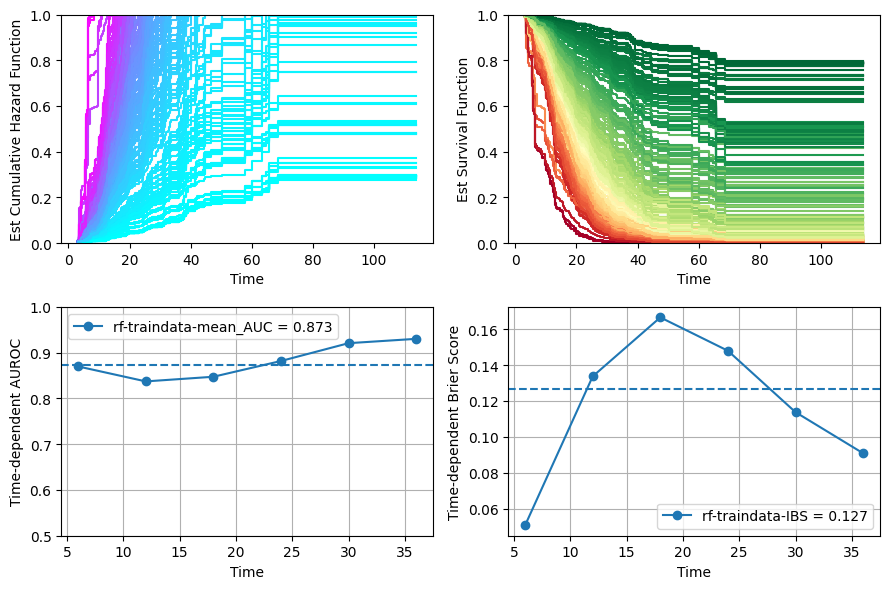

In [134]:
import numpy as np
# interest_times = np.arange(6, 12, 24)
interest_times = np.array([ 6, 12, 18, 24, 30, 36])
predresult_train_rf = mxjqsakit.evalfunc(
    model=rf.best_estimator_, 
    actualx=Trainx, 
    actualy=Trainy, 
    backy=Trainy, 
    timepoints=interest_times, 
    modelname="rf", 
    datasetname="traindata"
)
plt.savefig("r_eval_train_rf.pdf", dpi=300)

In [132]:
predresult_train_rf["metrics"]

,model,dataset,Cindex,Cindex_ipcw,meanAUC,IBS
0,rf,traindata,0.785,0.791,0.873,0.127


In [ ]:
predresult_train_rf["riskscore"]
# 转换为 DataFrame（指定列名，方便后续识别）
riskscore_df = pd.DataFrame(
    predresult_train_rf["riskscore"],  # 原始数据
    columns=["riskscore"]  # 列名，可自定义
)

# 保存为 CSV（index=False 表示不保存索引）
riskscore_df.to_csv("三个模型后融合-train_riskscore_results.csv", index=False)

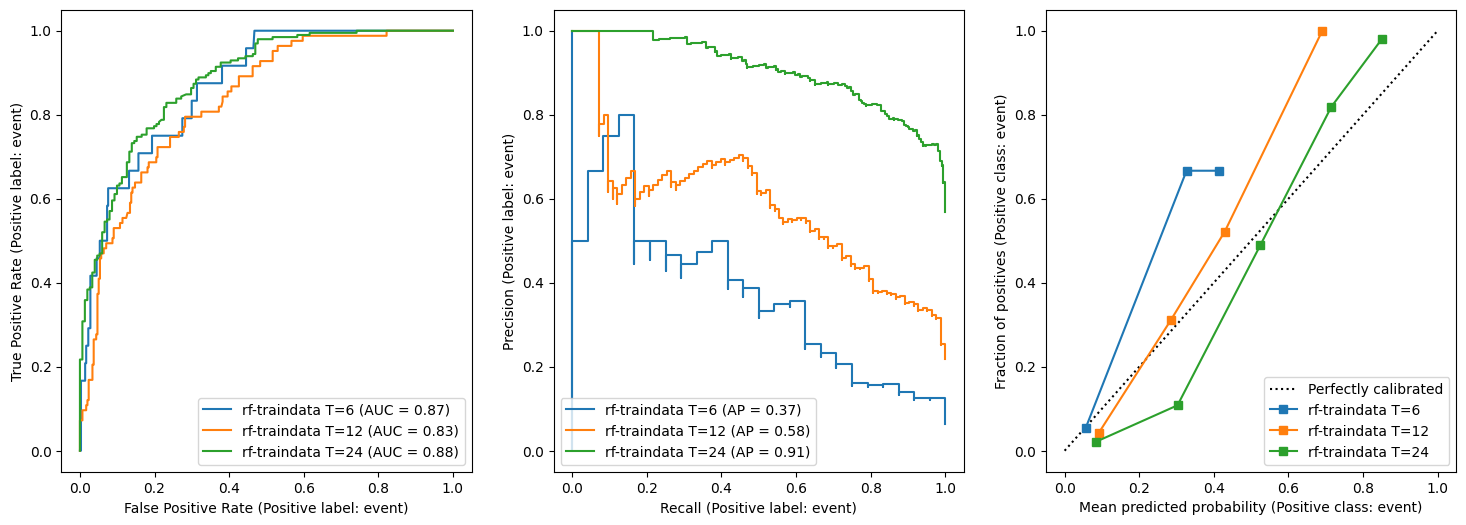

In [110]:
plots_train_rf = mxjqsakit.saplot(actualy = Trainy, 
                                     predsp = predresult_train_rf["sf"], 
                                     timepoint = [6, 12, 24], 
                                     timepoints = interest_times, 
                                     modelname = "rf", 
                                     datasetname="traindata")
plt.savefig("r_eval_train_rf_2.pdf", dpi=300)

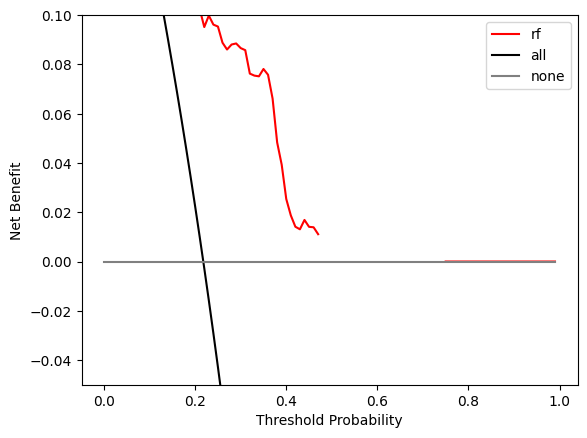

In [111]:
from dcurves import plot_graphs
plot_graphs(
    plot_df=mxjqsakit.dcadata(actualy = Trainy, predsp = predresult_train_rf["sf"], timepoint = 12, timepoints = interest_times, modelname = "rf"),
    graph_type='net_benefit',
    show_grid=False,
    color_names=["red", "black", "grey"],
    y_limits=[-0.05, 0.1],
    file_name="r_dca_train_rf.pdf",
    dpi=300
  )

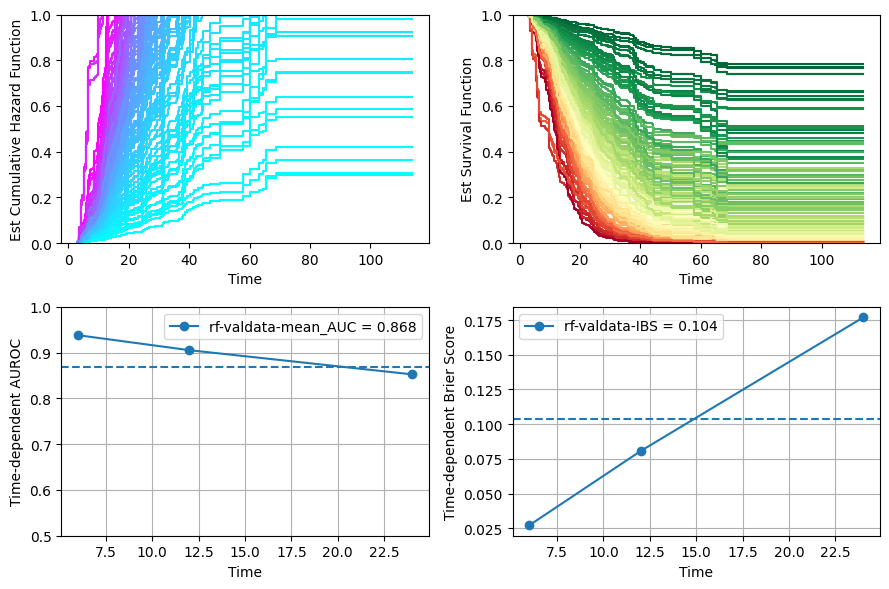

In [113]:
predresult_test_rf = mxjqsakit.evalfunc(
    model=rf.best_estimator_, 
    actualx=Internalx, 
    actualy=Internaly, 
    backy=Trainy, 
    timepoints=interest_times, 
    modelname="rf", 
    datasetname="valdata"
)
plt.savefig("r_eval_test_rf.pdf", dpi=300)

In [114]:
predresult_test_rf["metrics"]

,model,dataset,Cindex,Cindex_ipcw,meanAUC,IBS
0,rf,valdata,0.771,0.747,0.868,0.104


In [ ]:
predresult_test_rf["riskscore"]
# 转换为 DataFrame（指定列名，方便后续识别）
riskscore_df_test = pd.DataFrame(
    predresult_test_rf["riskscore"],  # 原始数据
    columns=["riskscore"]  # 列名，可自定义
)

# 保存为 CSV（index=False 表示不保存索引）
riskscore_df_test.to_csv("三个模型后融合-val_riskscore_results.csv", index=False)

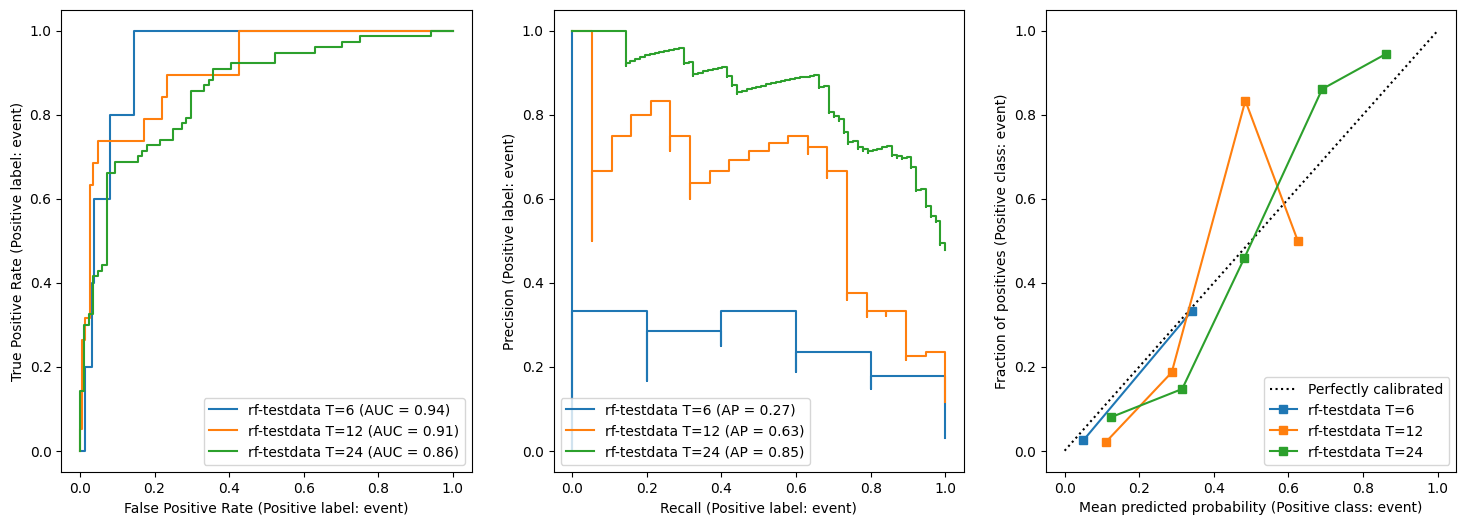

In [115]:
plots_test_rf = mxjqsakit.saplot(actualy = Internaly, 
                                     predsp = predresult_test_rf["sf"], 
                                     timepoint = [6, 12, 24], 
                                     timepoints = interest_times, 
                                     modelname = "rf", 
                                     datasetname="testdata")
plt.savefig("r_eval_test_rf_2.pdf", dpi=300)

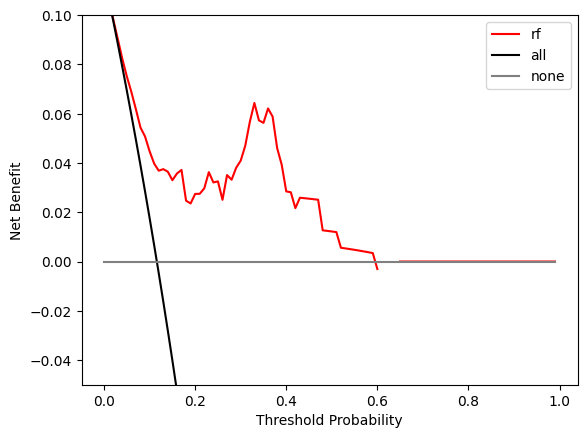

In [117]:
from dcurves import plot_graphs
plot_graphs(
    plot_df=mxjqsakit.dcadata(actualy = Internaly, predsp = predresult_test_rf["sf"], timepoint = 12, timepoints = interest_times, modelname = "rf"),
    graph_type='net_benefit',
    show_grid=False,
    color_names=["red", "black", "grey"],
    y_limits=[-0.05, 0.1],
    file_name="r_dca_test_rf.pdf",
    dpi=300
  )

(163, 3)
Radiomics    float64
DL           float64
DL25D        float64
dtype: object


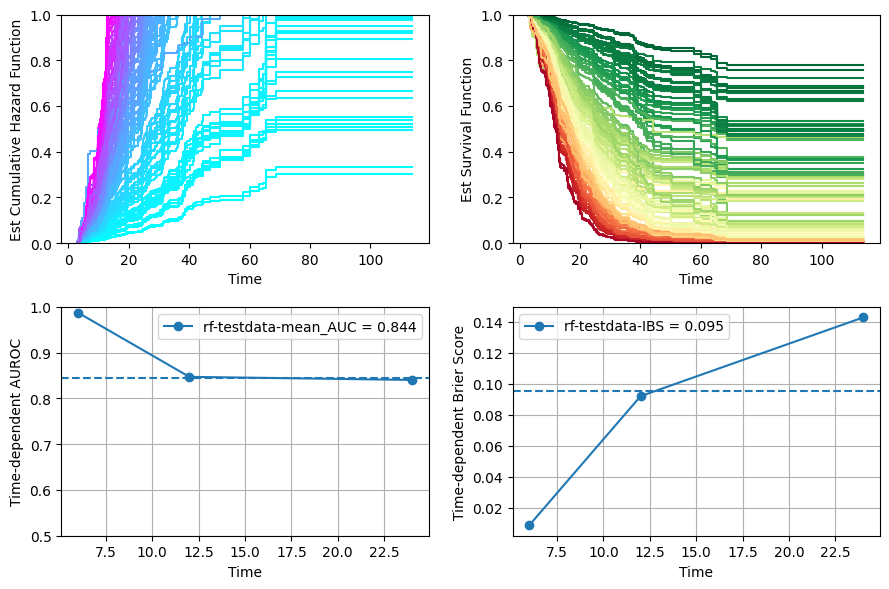

In [125]:
import pandas as pd
new = pd.read_csv("Combined_test_cox.csv")
# 剔除无关变量
new.drop("ID", axis=1, inplace=True)
# 分类变量转换为category
for i in catnames_train:
    new[i] = new[i].astype("category")
newx, newy = get_x_y(new, attr_labels=["event", "duration"], pos_label=1)
print(newx.shape)
print(newx.dtypes)
# print(Trainx.shape)
# print(Trainx.dtypes)
predresult_new_rf = mxjqsakit.evalfunc(
    model=rf.best_estimator_, 
    actualx=newx, 
    actualy=newy, 
    backy=Trainy, 
    timepoints=interest_times, 
    modelname="rf", 
    datasetname="testdata"
)
plt.savefig("r_eval_new_rf.pdf", dpi=300)

In [126]:
predresult_new_rf["metrics"]

,model,dataset,Cindex,Cindex_ipcw,meanAUC,IBS
0,rf,testdata,0.762,0.749,0.844,0.095


In [ ]:
predresult_new_rf["riskscore"]
# 转换为 DataFrame（指定列名，方便后续识别）
riskscore_df_new = pd.DataFrame(
    predresult_new_rf["riskscore"],  # 原始数据
    columns=["riskscore"]  # 列名，可自定义
)

# 保存为 CSV（index=False 表示不保存索引）
riskscore_df_new.to_csv("三个模型后融合-test_riskscore_results.csv", index=False)

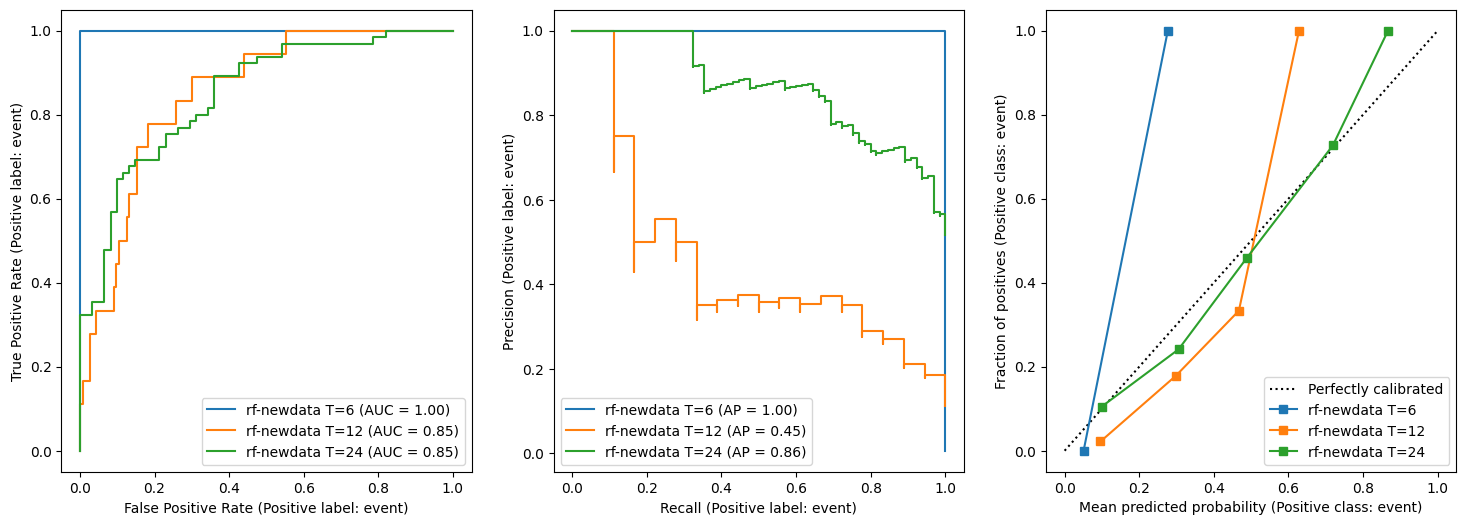

In [79]:
plots_new_rf = mxjqsakit.saplot(actualy = newy, 
                                     predsp = predresult_new_rf["sf"], 
                                     timepoint = [6, 12, 24], 
                                     timepoints = interest_times, 
                                     modelname = "rf", 
                                     datasetname="newdata")
plt.savefig("r_eval_new_rf_2.pdf", dpi=300)

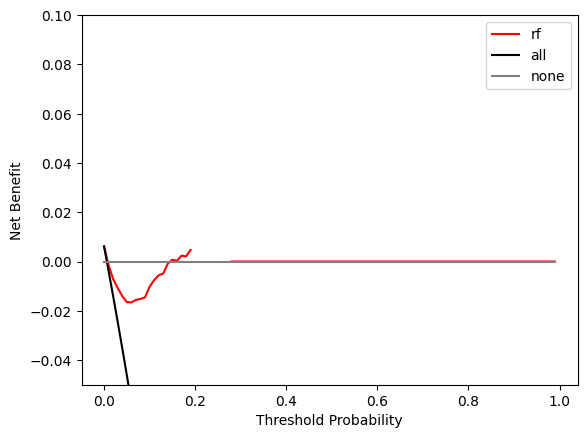

In [81]:
from dcurves import plot_graphs
plot_graphs(
    plot_df=mxjqsakit.dcadata(actualy = newy, predsp = predresult_new_rf["sf"], timepoint = 6, timepoints = interest_times, modelname = "rf"),
    graph_type='net_benefit',
    show_grid=False,
    color_names=["red", "black", "grey"],
    y_limits=[-0.05, 0.1],
    file_name="r_dca_new_rf.pdf",
    dpi=300
  )

## 模型解释

### 变量重要性

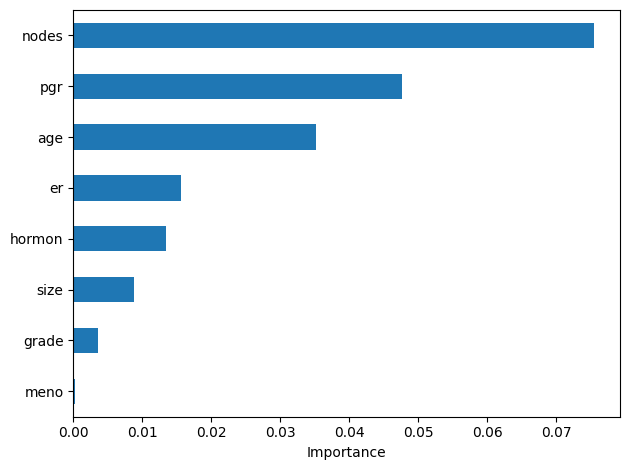

In [34]:
import warnings
warnings.filterwarnings("ignore")
mxjqsakit.vipplot(rf, trainx, trainy, type="bar")
plt.savefig("r_vipbar_rf.pdf", dpi=300)

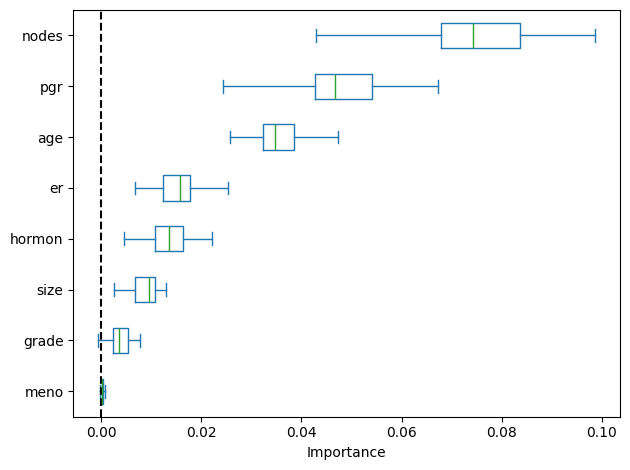

In [35]:
mxjqsakit.vipplot(rf, trainx, trainy, type="box")
plt.savefig("r_vipbox_rf.pdf", dpi=300)

### shap

In [ ]:
import shap
shap.initjs()

def shapmodel_rf(x):
    return rf.best_estimator_["rf"].predict(x)

trainx = shap.sample(trainx, random_state=42)
final_trainx = rf.best_estimator_["prep"].transform(trainx)
final_trainx

explainer_rf = shap.Explainer(shapmodel_rf, final_trainx)
shapvalues_rf = explainer_rf(final_trainx)
# shapvalues_rf
explanation_rf = mxjqsakit.shapagg(shapvalues_rf, trainx, final_trainx)
# explanation_rf

ExactExplainer explainer:  12%|█▏        | 12/100 [05:07<38:29, 26.25s/it]

In [ ]:
mxjqsakit.shap2plot(explanation_rf, trainx)
plt.savefig("r_shap_barbeeswarm_rf.pdf", dpi=300, bbox_inches="tight")   

In [ ]:
shap.plots.beeswarm(explanation_rf, max_display = 20, show = False)
plt.savefig("r_shap_beeswarm_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.violin(explanation_rf, plot_type="layered_violin", max_display = 20, show = False)
plt.savefig("r_shap_violin_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.bar(explanation_rf, max_display = 20, show = False)
plt.savefig("r_shap_vipbar_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.scatter(explanation_rf[:, "pgr"], show = False)
plt.savefig("r_shap_pdp_rf_pgr.pdf", dpi=300, bbox_inches="tight")

shap.plots.scatter(explanation_rf[:, "pgr"], color=explanation_rf, show = False)
plt.savefig("r_shap_pdp_rf_color_pgr.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.scatter(explanation_rf[:, "grade"], show = False)
plt.savefig("r_shap_pdp_rf_grade.pdf", dpi=300, bbox_inches="tight")

shap.plots.scatter(explanation_rf[:, "grade"], color=explanation_rf, show = False)
plt.savefig("r_shap_pdp_rf_color_grade.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.bar(explanation_rf[0], max_display = 20, show = False)
plt.savefig("r_shap_41bar_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.waterfall(explanation_rf[0], max_display = 20)
# shap.plots.waterfall(explanation_rf[0], max_display = 20, show=False)
# plt.savefig("r_shap_41warterfall_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.force(explanation_rf[0], matplotlib = True, show=False)
# plt.savefig("r_shap_41force_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.force(explanation_rf)

In [ ]:
plt.close()
shap.plots.heatmap(explanation_rf)
# shap.plots.heatmap(explanation_rf, show=False)
# plt.savefig("r_shap_heatmap_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.decision_plot(explanation_rf.base_values[1],
                   explanation_rf.values, 
                   explanation_rf.data,
                   feature_names=list(trainx.columns.sort_values()))
# shap.decision_plot(explanation_rf.base_values[1],
#                    explanation_rf.values, 
#                    explanation_rf.data,
#                    feature_names=list(trainx.columns.sort_values()),
#                    show=False)
# plt.savefig("r_shap_decision_rf.pdf", dpi=300, bbox_inches="tight")

# 保存结果

In [ ]:
rf_result = dict(model = rf, 
                    predeval_train = predresult_train_rf,
                    predeval_test = predresult_test_rf,
                    plots_train = plots_train_rf,
                    plots_test = plots_test_rf)
from joblib import dump
dump(rf_result, ".\\result\\rf_result.joblib")

In [ ]:
shiny4rf = dict(model = rf, 
                    train_x = trainx, 
                    train_y = trainy,
                    explainer_lr = explainer_rf)
from joblib import dump
dump(shiny4rf, ".\\result4shiny\\shiny4rf.joblib")